In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import json

In [2]:
results_dir = './results/models'

In [3]:
def template_to_regex(model_name, dataset, lp=False, model_postfix=''):
    # Escape any special regex characters in model_name
    model_prefix = re.escape(model_name)
    model_postfix = '' if model_postfix == '' else f"_{model_postfix}"
    
    # Build the pattern in parts
    pattern = f"{model_prefix}_{dataset}{model_postfix}"  # Fixed model name prefix
    if lp:
        pattern += r"_lp"          # Optional _lp
    pattern += r"_lr(\d+(?:\.\d+)?e?-?\d*)"  # Learning rate in decimal or scientific notation
    pattern += r"_wd(\d+(?:\.\d+)?e?-?\d*)"  # Weight decay in decimal or scientific notation
    pattern += r"(.*)"            # Any remaining postfix
    
    return pattern


In [4]:
model_name = "LESSVIT_b2_d6"
dataset = 'eurosat'
lp = False
pattern = template_to_regex(model_name, dataset, lp)

def get_model_name(result_dirs, model_pattern):
    filtered_model_names = []
    for result_dir in os.listdir(result_dirs):
        if re.match(model_pattern, result_dir):
            filtered_model_names.append(result_dir)
    return filtered_model_names
           
filtered_model_names = get_model_name(results_dir, pattern)

In [28]:
def get_target_logs(target_dirs, dataset):
    results = []
    for target_dir in target_dirs:
        log_path = os.path.join(results_dir, target_dir, "test_results.json")
        try:    
            with open(log_path, 'r') as f:
                log = json.load(f)
            # log['model'] = target_dir
        # parse the model_dir
            log["base_model"] = target_dir.split(f"_{dataset}")[0]
            log['lr'] = float(re.search(r"lr(\d+(?:\.\d+)?e?-?\d*)", target_dir).group(1))
            log['weight_decay'] = float(re.search(r"wd(\d+(?:\.\d+)?e?-?\d*)", target_dir).group(1))
            log['checkpoint'] = int(re.search(r"ckpt(\d+)", target_dir).group(1))
            log['moe'] = int(re.search(r"moe(-?\d+)", target_dir).group(1))
            log['moe'] = 14 if log['moe'] == -1 else log['moe']
            log['eval_accuracy'] *= 100
            results.append(log)
        except:
            continue
        # convert to df
        df = pd.DataFrame(results).drop(columns=['eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second'])
    return df

In [29]:
df_all = get_target_logs(filtered_model_names, dataset)

In [30]:
df_all

,epoch,eval_accuracy,eval_loss,base_model,lr,weight_decay,checkpoint,moe
0,20.0,97.074074,0.129004,LESSVIT_b2_d6,0.0003,0.01,40000,14
1,20.0,96.870370,0.135243,LESSVIT_b2_d6,0.0003,0.01,30000,0
2,20.0,96.240741,0.125595,LESSVIT_b2_d6,0.0005,0.01,60000,3
3,20.0,96.814815,0.140385,LESSVIT_b2_d6,0.0001,0.01,60000,3
4,20.0,96.907407,0.134031,LESSVIT_b2_d6,0.0001,0.01,40000,3
5,20.0,96.981481,0.131635,LESSVIT_b2_d6,0.0003,0.01,60000,5
6,20.0,97.166667,0.118397,LESSVIT_b2_d6,0.0005,0.01,30000,3
7,20.0,96.944444,0.139498,LESSVIT_b2_d6,0.0001,0.01,50000,3
8,20.0,97.240741,0.131142,LESSVIT_b2_d6,0.0003,0.01,50000,0
9,20.0,96.962963,0.125988,LESSVIT_b2_d6,0.0003,0.01,30000,3


In [31]:
df_6000 = df_all.loc[df_all["checkpoint"]==60000].sort_values(by=['eval_accuracy'], ascending=False)
df_6000

,epoch,eval_accuracy,eval_loss,base_model,lr,weight_decay,checkpoint,moe
11,20.0,97.259259,0.121414,LESSVIT_b2_d6,0.0003,0.01,60000,3
23,20.0,97.055556,0.130018,LESSVIT_b2_d6,0.0003,0.01,60000,14
5,20.0,96.981481,0.131635,LESSVIT_b2_d6,0.0003,0.01,60000,5
19,20.0,96.925926,0.128392,LESSVIT_b2_d6,0.0003,0.01,60000,0
3,20.0,96.814815,0.140385,LESSVIT_b2_d6,0.0001,0.01,60000,3
2,20.0,96.240741,0.125595,LESSVIT_b2_d6,0.0005,0.01,60000,3


[Text(0, 0, '96.93'),
 Text(0, 0, '97.26'),
 Text(0, 0, '96.98'),
 Text(0, 0, '97.06')]

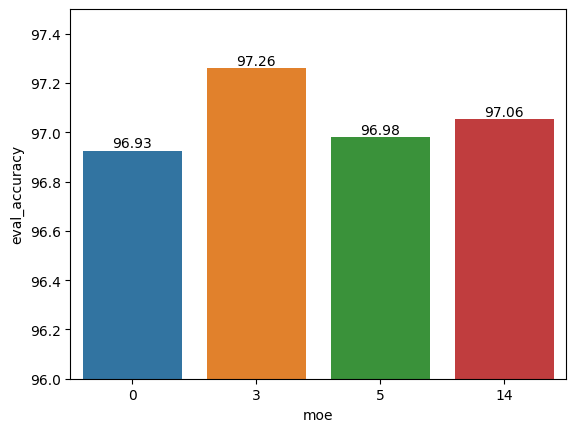

In [32]:
sns.barplot(data=df_6000.loc[df_6000.lr==0.0003], x='moe', y='eval_accuracy').set(ylim=(96, 97.5))
# set the width of the bar
plt.gca().bar_label(plt.gca().containers[0], fmt='%.2f')
# set x axis log scale
# plt.xscale('log')
# df_all.sort_values(by=['eval_accuracy'], ascending=False)


In [9]:
df_all = pd.DataFrame()
for target_log in target_logs:
    name = '_'.join(target_log.split('_')[-3:])
    try:
        path = f'./results/logs/{target_log}/lp_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
# df_all.sort_values(by=[metric], inplace=True)
# get the best lr for each model
df_all_best = df_all.loc[df_all.groupby('model')[metric].idxmax()]
df_all
df_all_best.sort_values(by=[metric])

NameError: name 'target_logs' is not defined

<Axes: xlabel='lr', ylabel='accuracy'>

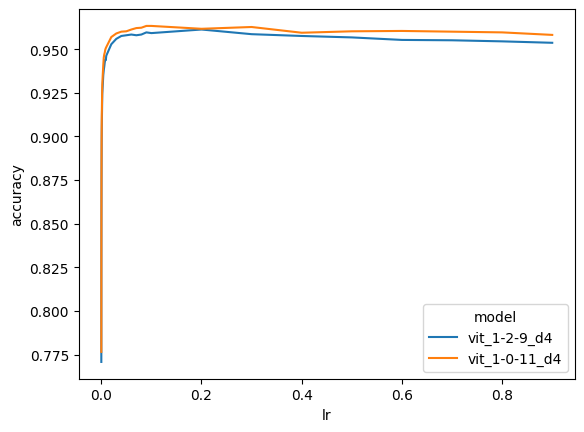

In [9]:
sns.lineplot(data=df_all.loc[df_all.epochs==100], x='lr', y=metric, hue='model')

In [40]:
# parse the model name in the df_all_best
df = df_all_best.copy()
df['model'] = df['model'].apply(lambda x: x.split('_')[-1])
df['spectral'] = df['model'].apply(lambda x: x.split('-')[0])
df['spatial_spectral'] = df['model'].apply(lambda x: x.split('-')[1])
df[metric] *= 100

IndexError: list index out of range

In [ ]:
# drop the heatmap of df_all_best_cvit, x: spatial_spectral, y: spectral, hue: metric
df_attn = df.pivot(index='spectral', columns='spatial_spectral', values=metric)
column_order = ['0', '1', '2', '4', '12']  # replace with your desired order
df_attn = df_attn.reindex(column_order, axis=1)
sns.heatmap(df_attn, annot=True, fmt=".2f", cmap='crest', linewidth=.5, vmin=60.5)
plt.title(f'{dataset} LP {metric} (%)')

KeyError: 'spatial_spectral'

In [22]:
df_all_best_cvit.pivot()

TypeError: DataFrame.pivot() takes 1 positional argument but 2 were given